In [12]:
import json
import os
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import io

DAILY_TREND_JSON = 'data/dailyTrend.json'



In [13]:
print('foo')

df = pd.read_json(DAILY_TREND_JSON)
df['datet'] = df['name'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
df['dow'] = df['datet'].apply(lambda x: x.strftime('%A'))

df.tail()

foo


,name,Tokyo,7dayAvg,datet,dow
383,2021-03-08,116,253.428571,2021-03-08,Monday
384,2021-03-09,290,261.714286,2021-03-09,Tuesday
385,2021-03-10,340,265.142857,2021-03-10,Wednesday
386,2021-03-11,335,273.142857,2021-03-11,Thursday
387,2021-03-12,304,273.571429,2021-03-12,Friday


In [14]:
import requests
import io

s = io.StringIO(requests.get('https://www8.cao.go.jp/chosei/shukujitsu/syukujitsu.csv').content.decode('Shift-JIS'))
holidays = pd.read_csv(s)

last50holidays = holidays.iloc[-50:,0:2]
last50holidays = last50holidays.rename(columns={'国民の祝日・休日月日':'hdate'})
last50holidays['datet'] = last50holidays['hdate'].apply(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d'))


Text(0.5, 1.0, 'Day of Week rank for last 90 as of 2021-03-12 20:35:16.850518')

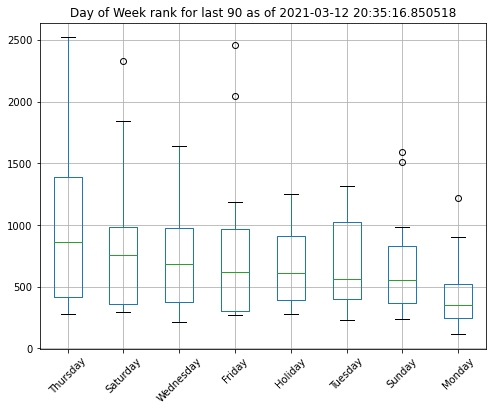

In [18]:
df2 = pd.merge(df, last50holidays, on='datet', how='left')
df2.loc[df2['hdate'].isnull() != True, 'dow'] = 'Holiday'
df2_sorted = df2[['dow','Tokyo']].groupby('dow').median().sort_values(by='Tokyo', ascending=False)

#df2 = df2[df2_sorted.index]
#df2[['dow','Tokyo']].tail(180).groupby(by='dow').boxplot(figsize=(8,10), subplots=False, fontsize=8, rot=45)
days = 90

def boxplot_sorted(df, by, column):
  df3 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
  meds = df3.median().sort_values(ascending=False)
  df3[meds.index].boxplot(rot=45, figsize=(8,6))

import datetime
boxplot_sorted(df2.tail(days), by=["dow"], column="Tokyo")
plt.title(f"Day of Week rank for last {days} as of {datetime.datetime.now()}")


In [19]:
import io
import json
import datetime

f = open('data/dailyTrend.json','r')
contents = f.read()
j = json.loads(contents)

for l in j:
    dstr = l['name']
    d = datetime.datetime.strptime(dstr,'%Y-%m-%d')
    l['dow'] = d.strftime('%A')

maxtotal = 0
maxdate = None
maxdows = {}

for l in j:
    if l['Tokyo'] > maxtotal:
        maxtotal = l['Tokyo']
        maxdate = l['name']
    dow = l['dow']
    if (maxdows.get(dow) is None):
        maxdows[dow] = l['Tokyo']
    elif (l['Tokyo'] > maxdows[dow]):
        maxdows[dow] = l['Tokyo']
        
print(f'max {max} on {maxdate} ')
print(f'maxdows {maxdows}')


    
#df['datet'] = df['name'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
#df['dow'] = df['datet'].apply(lambda x: 



max <built-in function max> on 2021-01-07 
maxdows {'Friday': 2459, 'Saturday': 2332, 'Thursday': 2520, 'Sunday': 1595, 'Tuesday': 1315, 'Wednesday': 1640, 'Monday': 1252}
